In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [38]:
def show(image):
    """Show an image"""
    img = plt.imshow(image)
    img.set_cmap("gray")
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(svd_result):
    U, s, VT = svd_result
    return np.dot(U, np.dot(np.diag(s), VT))

(30, 30)


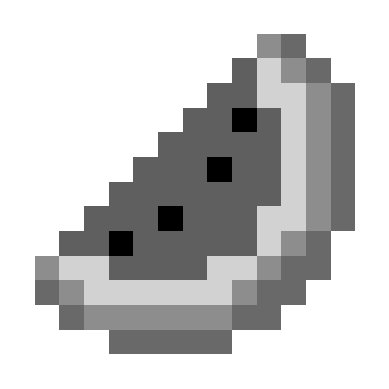

In [44]:
image = to_gray(imread('images/watermelon.png'))
image = cv2.resize(image, (30, 30), interpolation=0)
print(image.shape)
show(image)

=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2   0    -0.1   0.1  -0     0     0    -0     0     0     0     0    -0    -0     0    -0     0.9
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2  -0.7   0.1   0.1   0     0    -0.1  -0.2   0.1  -0.2  -0    -0     0     0     0     0    -0.3
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1  -0    -0.6   0.3  -0.2   0     0.1  -0.1  -0.1  -0.1  -0    -0     0     0     0     0    -0.1
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1   0     0.6  -0.3   0.2  -0    -0.1   0.1   0.1   0.1   0     0    -0    -0    -0    -0     0.1
-0.2  -0.2   0.1   0.2  -0.2   0.3  -0    -0     0.1  -0.1  -0.3   0.1  -0.4  -0     0     0   

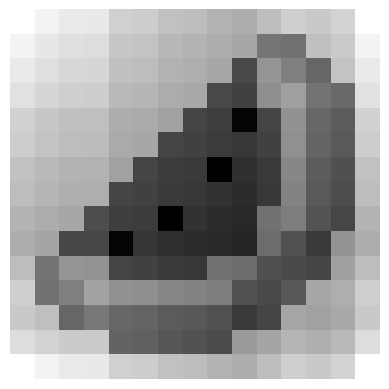

In [55]:
u, s, v = svd(image)
s[0] = 50
print_svd((u,s,v))
show(product_svd((u, s, v)))

(15, 15)


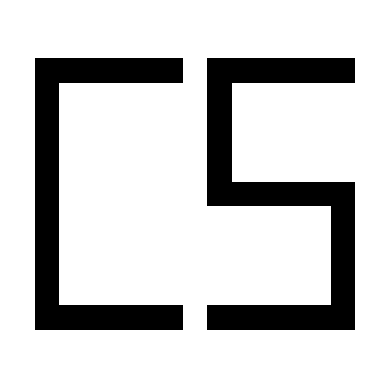

In [99]:
watermark = to_gray(imread('images/cs.png'))
print(watermark.shape)
show(watermark)

In [23]:
print_svd(svd(image))

=== U ===
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2   0    -0.1   0.1  -0     0     0    -0     0     0     0     0    -0    -0     0    -0     0.9
-0.2  -0.2  -0    -0.1  -0.2  -0.2   0    -0.1   0.1   0    -0.1  -0     0.1   0.2  -0.7   0.1   0.1   0     0    -0.1  -0.2   0.1  -0.2  -0    -0     0     0     0     0    -0.3
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1  -0    -0.6   0.3  -0.2   0     0.1  -0.1  -0.1  -0.1  -0    -0     0     0     0     0    -0.1
-0.2  -0.3   0    -0.1   0.1   0.1   0.1   0.1  -0.4  -0.3   0.2   0.1   0    -0.1   0     0.6  -0.3   0.2  -0    -0.1   0.1   0.1   0.1   0     0    -0    -0    -0    -0     0.1
-0.2  -0.2   0.1   0.2  -0.2   0.3  -0    -0     0.1  -0.1  -0.3   0.1  -0.4  -0     0     0   

In [81]:
def embed(image, watermark):
    U_img, s_img, VT_img = svd(image)
    U_wm, s_wm, VT_wm = svd(watermark)
    U_img[15:, 15:] = U_wm
    s_img[15:] = s_wm
    VT_img[15:, 15:] = VT_wm
    return U_img, s_img, VT_img
    

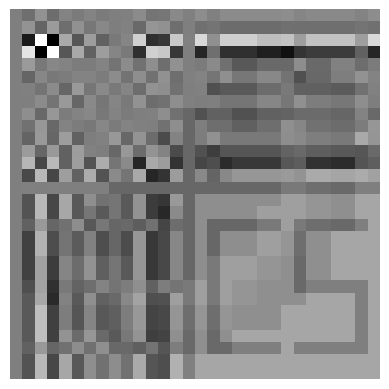

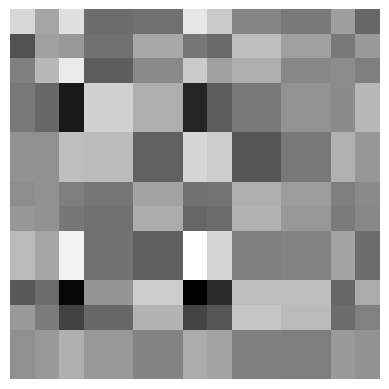

In [82]:
new_image = product_svd(embed(image, watermark))
uu, ss, vv = svd(new_image)
test = product_svd((uu[15:, 15:], ss[15:] , vv[15:, 15:]))
show(new_image)
show(test)

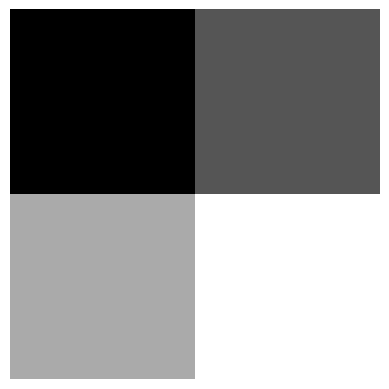

-  -
0  1
2  3
-  -
=== U ===
----  ----
-0.2  -1
-1     0.2
----  ----
=== sigma ===
---  ---
3.7  0
0    0.5
---  ---
=== V transpose ===
----  ----
-0.5  -0.9
 0.9  -0.5
----  ----


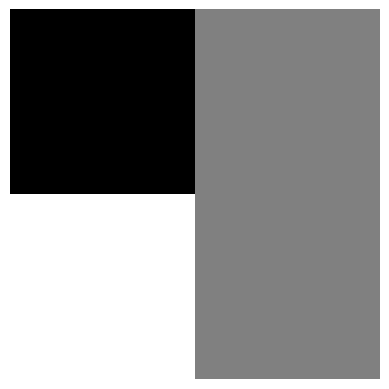

-  -
0  1
2  1
-  -
=== U ===
----  ----
-0.2  -1
-1     0.2
----  ----
=== sigma ===
---  ---
2.3  0
0    0.9
---  ---
=== V transpose ===
----  ----
-0.9  -0.5
 0.5  -0.9
----  ----
-  -  -  -
0  0  1  1
0  0  1  1
2  2  3  3
2  2  3  3
-  -  -  -
-  -  -  -
0  0  1  1
0  0  1  1
2  2  1  1
2  2  1  1
-  -  -  -


In [132]:
A = np.array([[0., 1.], [2., 3.]])
B = np.array([[0., 1.], [2., 1.]])
show(A)
printf(A)
print_svd(svd(A))
show(B)
printf(B)
print_svd(svd(B))
A2x = cv2.resize(A, (4, 4), interpolation=0)
B2x = cv2.resize(B, (4, 4), interpolation=0)
printf(A2x)
printf(B2x)

In [133]:
A2x[:, 1] += 0.1 * B2x[:, 1]
A2x[:, 3] += 0.1 * B2x[:, 3]

In [134]:
A2x

array([[0. , 0. , 1. , 1.1],
       [0. , 0. , 1. , 1.1],
       [2. , 2.2, 3. , 3.1],
       [2. , 2.2, 3. , 3.1]])

In [113]:
ua, sa, va = svd(A2x)
ub, sb, vb = svd(B2x)

ua[:, 2:] = ub[:, :2]
sa[2:] = sb[:2]
va[2:] = vb[:2]

print_svd((ua, sa, va))

=== U ===
----  ----  ----  ----
-0.2  -0.7  -0.2  -0.7
-0.2  -0.7  -0.2  -0.7
-0.7   0.2  -0.7   0.2
-0.7   0.2  -0.7   0.2
----  ----  ----  ----
=== sigma ===
---  ---  ---  ---
7.4  0    0    0
0    1.1  0    0
0    0    4.6  0
0    0    0    1.7
---  ---  ---  ---
=== V transpose ===
----  ----  ----  ----
-0.4  -0.4  -0.6  -0.6
 0.6   0.6  -0.4  -0.4
-0.6  -0.6  -0.4  -0.4
 0.4   0.4  -0.6  -0.6
----  ----  ----  ----


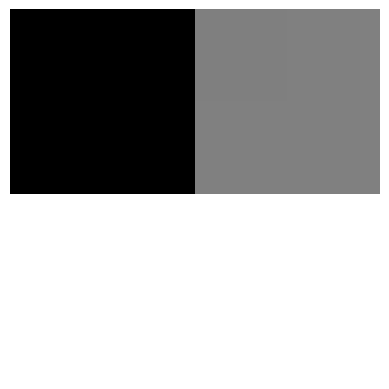

--  --  -  -
-0  -0  2  2
 0  -0  2  2
 4   4  4  4
 4   4  4  4
--  --  -  -
=== U ===
---  ----  ----  ----
0.2  -0.7  -0.7  -0
0.2  -0.7   0.7   0
0.7   0.2  -0    -0.7
0.7   0.2  -0     0.7
---  ----  ----  ----
=== sigma ===
----  ---  -  -
11.7  0    0  0
 0    2.7  0  0
 0    0    0  0
 0    0    0  0
----  ---  -  -
=== V transpose ===
---  ----  ----  ----
0.5   0.5   0.5   0.5
0.5   0.5  -0.5  -0.5
0.4  -0.4   0.6  -0.6
0.6  -0.6  -0.4   0.4
---  ----  ----  ----


In [112]:
new_image = product_svd((ua, sa, va))
show(new_image)
printf(new_image)
print_svd(svd(new_image))